# Welcome to Introductory Talk about PyTorch 

# by Jack Camier, Python developer

In [1]:
import torch # torch==1.6.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
from IPython.display import Image

In [87]:
conda -V

conda 4.8.3

Note: you may need to restart the kernel to use updated packages.


In [88]:
!python --version

Python 3.7.7


## PyTorch was created by Facebook Ai Research (FAIR) by Adam Paszke, Sam Gross, Soumith Chintala, Gregory Chanan

## A number of pieces of Deep Learning software are built on top of PyTorch, including Tesla Autopilot, and Uber's Pyro, comma.ai
https://en.wikipedia.org/wiki/PyTorch

<h1 style="color: red;"><i>Warning - There will be a lot of mathematical concepts when dealing with deep learning projects !!!<i></h1>

## Please note we will go over some math, building our knowledge of PyTorch to eventually create a linear regression model.

## Linear Regression is basically predicting a future value based on previous values.

<hr>
<h2>You can use Google Colab for PyTorch Notebooks</h2>

https://colab.research.google.com
<hr>

# Let's first talk about dimensions to better understand what are Tensors (a key component of PyTorch:

## Dimension: the miniumum number of coordinates needed to specify any point within the space.
<hr>

## Zero Dimensional: an object that has no length, width or height

## One Dimensional: an object that has only length and no width

## Two Dimensional: an object that have length and width but do not have thickness.

## Three dimensional: an object that have three dimensions – length, width, and height.

## Fourth dimensional: length, width, height and time (special relativity - Einstein's theory)

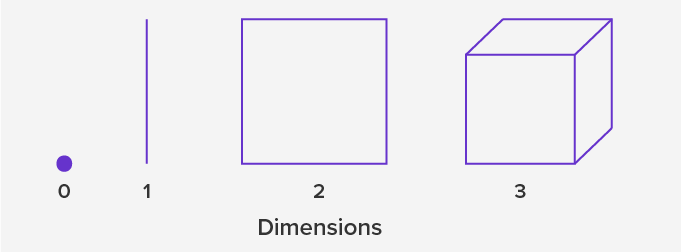

In [89]:
Image(filename='./dimensions.png') 

# What is a Tensor then?

## An algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space. 
https://en.wikipedia.org/wiki/Tensor#:~:text=In%20mathematics%2C%20a%20tensor%20is,scalars%2C%20and%20even%20other%20tensors.

## They are analagous to an N-dimensional Array

In [90]:
%%HTML
<img src="tensor.png" width="400"/>

## Zero dimension tensor:

## Scalars (quantities that are fully described by a magnitude or numerical value alone)

In [91]:
zero_d_tensor = torch.tensor([1.])
zero_d_tensor

tensor([1.])

## `1.` is a shorthand for `1.0` It is used to indicate to PyTorch that you want to create a floating-point number. We can verify this by checking the dtype attribute of our tensor.

## Also, we can call the `shape` and `dtype` methods to get details about the tensor.

In [92]:
zero_d_tensor.shape

torch.Size([1])

In [93]:
zero_d_tensor.dtype

torch.float32

## One Dimensional Tensor (Array):

## Vectors (quantities that are fully described by both a magnitude and a direction)
<h3><li>Basically the same as a linear array - a Python list</li></h3>

In [95]:
one_d_tensor = torch.tensor([1, 2, 3])
one_d_tensor

tensor([1, 2, 3])

## Two Dimensional Tensor (Array):
## Matrices - a list within a list, an excel sheet
<h3><li>Side note, 2D Tensors are used when dealing with gray scale images 0 (Black) to 255 (White) </li></h3>

In [96]:
x1 = np.array([0, 3, 5])
x2 = np.array([5, 5, 2])
arrays_2d = np.array([x1,x2])
arrays_2d

array([[0, 3, 5],
       [5, 5, 2]])

## Convert numpy array to tensor

In [97]:
two_d_tensor = torch.from_numpy(arrays_2d)
two_d_tensor

tensor([[0, 3, 5],
        [5, 5, 2]])

## Three Dimensional tensors (n-dimensional arrays). A list within a list within a list

## Using the `arange` and `view` chaining methods:

In [98]:
tensor_3d = torch.arange(18).view(3, 2, 3)
tensor_3d

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

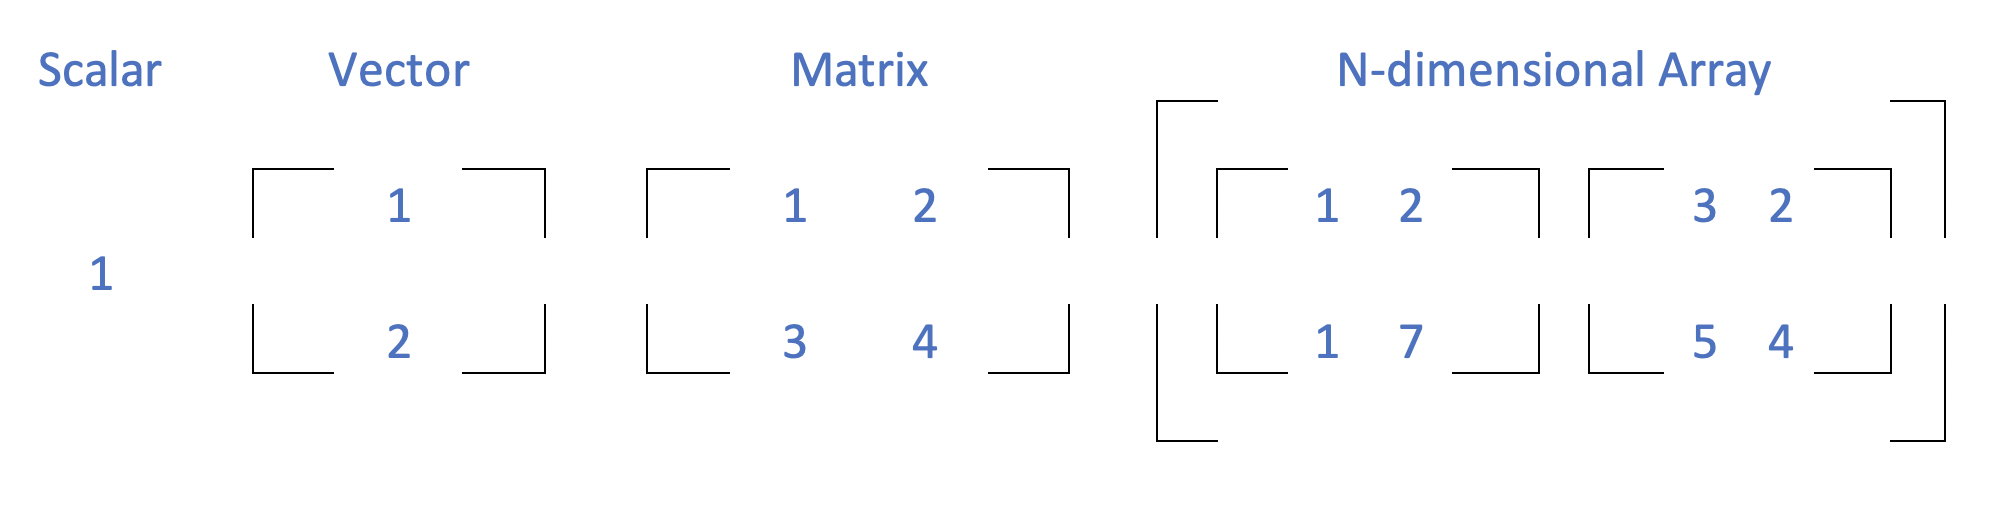

In [99]:
Image(filename='./scalar_to_n_dimension.png')  

<hr>

## Quick reminder on python slicing:
## 0 is the beginning of an index, not 1
## Beginning index (inclusive) `:` ending index (exclusive)
## `:` by itself is indicative of all items before and after
<hr>

## Tensor slicing:
## Index, row, column

In [100]:
tensor_3d

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [101]:
tensor_3d[0, 1, 0]

tensor(3)

In [102]:
# Tensor sicing
tensor_3d[1, 1, 1]

tensor(10)

In [103]:
# Tensor segment slicing (explicit):
tensor_3d[1, 0:2, 0:3]

tensor([[ 6,  7,  8],
        [ 9, 10, 11]])

In [104]:
# Tensor segment slicing (implicit):
tensor_3d[1, :, :]

tensor([[ 6,  7,  8],
        [ 9, 10, 11]])

## Gradients: Partial derivatives of a multivariable function
<h3><li>Important to know (helpful) when performing the Gradient Descent algorithm for Neural Networks</li></h3>

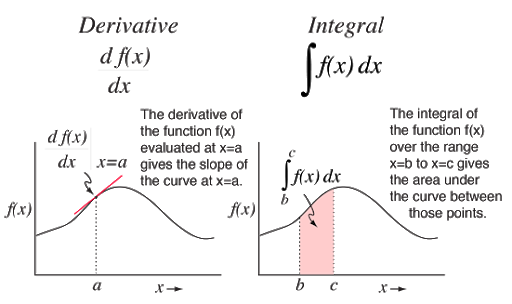

In [105]:
Image(filename='./derivaties.png') 

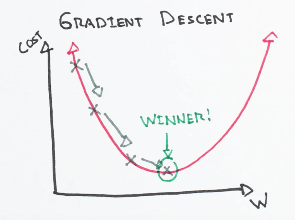

In [8]:
Image(filename='./gradient_descent_demystified.png') 

## Arithmetic methods:

In [107]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [108]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

## Compute derivatives by using the `backward` method:

<h2 style="color: blue;"><i>Where was this method when I was doing calculus?!!!<i></h2>

In [109]:
y.backward()

## The derivatives of y with respect to the input tensors are stored in the .grad property of their respective tensors.

In [110]:
# Display gradients
print(f'dy/dx: {x.grad}')
print(f'dy/dw: {w.grad}')
print(f'dy/db: {b.grad}')

dy/dx: None
dy/dw: 3.0
dy/db: 1.0


## Another example

In [111]:
x = torch.tensor(2.0, requires_grad = True)
y = 9*x**4 + 2*x**3 + 3*x**2 + 6*x + 1
y.backward()
x.grad

tensor(330.)

In [112]:
x = torch.tensor(1.0, requires_grad = True)
z = torch.tensor(2.0, requires_grad = True)
y = x**2 + z**3
y.backward()
x.grad

tensor(2.)

In [113]:
z.grad

tensor(12.)

## PyTorch helpful methods:

In [120]:
z = np.array([[3,4],[3,-2],[4,-2]]) # 2 x 3 array
z

array([[ 3,  4],
       [ 3, -2],
       [ 4, -2]])

## The `reshape` method to change the shape of the matrix

In [122]:
z = np.array([3,4,3,-2,4,-2]).reshape(3,2)
z

array([[ 3,  4],
       [ 3, -2],
       [ 4, -2]])

In [123]:
b = torch.from_numpy(z)
b

tensor([[ 3,  4],
        [ 3, -2],
        [ 4, -2]])

## Tensor matrix multiplication example:

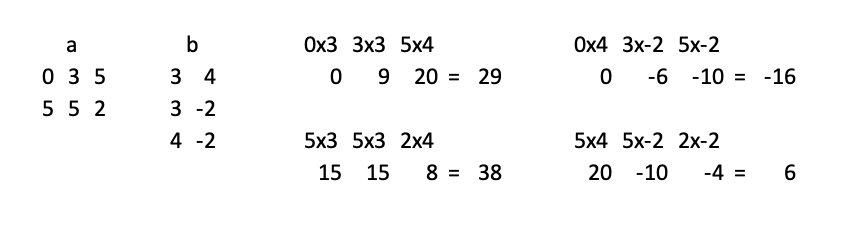

In [124]:
Image(filename='./matrix_mult.png') 

In [125]:
mat_a = torch.tensor([0,3,5,5,5,2]).view(2,3)
mat_b = torch.tensor([3,4,3,-2,4,-2]).view(3,2)
mat_a, mat_b

(tensor([[0, 3, 5],
         [5, 5, 2]]),
 tensor([[ 3,  4],
         [ 3, -2],
         [ 4, -2]]))

In [126]:
torch.matmul(mat_a, mat_b) # Way simpler!

tensor([[ 29, -16],
        [ 38,   6]])

<hr>

# Quick Recap on Machine Learning:

## Classical Programming vs Machine Learning

In [1]:
%%HTML
<img src="reg_prog_ml_comparison.png" width="400"/>

<h1>Different types of Machine Learning:</h1>
<h2>(1) Supervised Learning uses labeled data to predict a <i>label</i> given some features.</h2>
<br>
<li>Continuous: regression problem</li>
<li>Categorical: classification problem</li>

<h2>(2) Unsupervised Learning is where there are no <i>labels</i> and looks for previously undetected patterns in a data set with a minimum of human supervision.</h2> 
<br>
<li>Clustering (into groups) is an example of this ML process.</li> 
<li>Requires domain knowledge to interpret</li>

<h2>(3) Reinforcement Learning works through trial and error which actions yield the greatest rewards</h2>
<br>
<li>Agent (Learning/Decision Maker)</li>
<li>Environment - where the Agent interacts in</li>
<li>Actions - what the Agent can do</li>

## Machine Learning Steps for supervised learning:
### - Data acquistion
### - Data clean up (most of time spent)
### - Split data into Test (30%) and Training (70%)
### - Train Model (Testing)
### - Evaluate the model (adjust model parameters) and train model again
### - Deploy Model

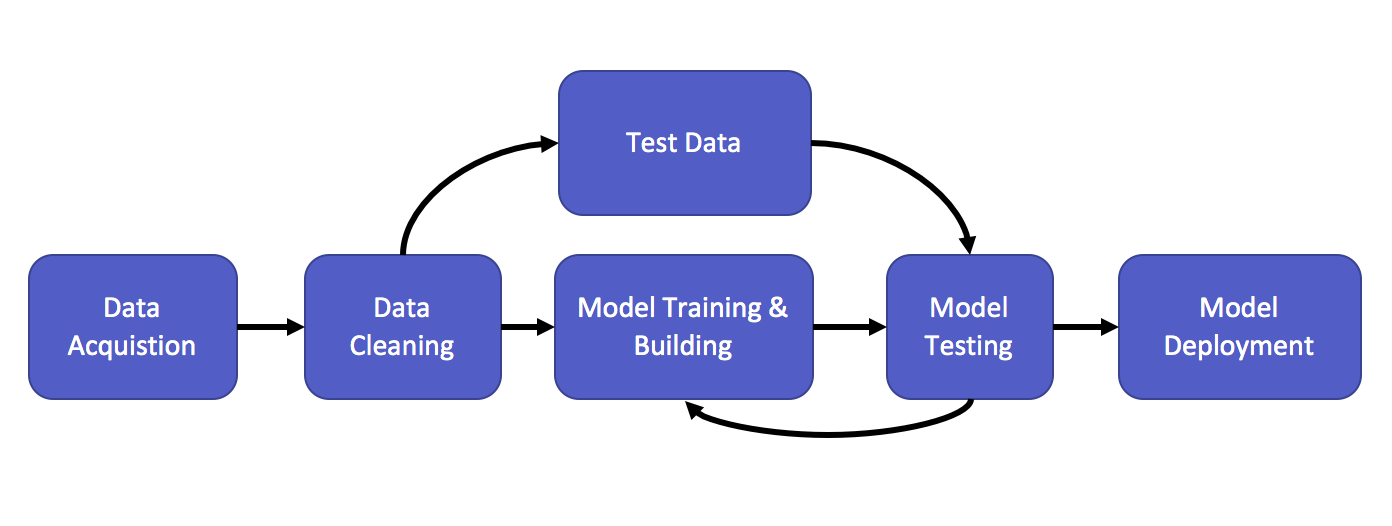

In [5]:
Image(filename='./Machine Learning Process Flow.png')

<hr>

# Let's start with a linear regression modeling example

## Slope of a line:

## y = w*x + b
## w = weight
## b = bias

## `y = mx + b`, the slope is the number "m" that is multiplied on the x, and "b" is the y-intercept (the point where the line crosses the vertical y-axis)

## We will train the model to have the optimal weight and bias values which will give us a line with the best fit.

In [130]:
w = torch.tensor(3.0, requires_grad=True) # 3.0 is a random, arbitrary value

b = torch.tensor(1.0, requires_grad=True) # 1.0 is a random, arbitrary value as well

In [131]:
def pred_y(x):
    y = w*x + b
    return y

In [132]:
x = torch.tensor(2.0)
pred_y(x)

tensor(7., grad_fn=<AddBackward0>)

In [133]:
x = torch.tensor([[4], [7]])
pred_y(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [134]:
from torch.nn import Linear

## In order to set random values that will be consistent we use seeds

In [135]:
torch.manual_seed(1)

## Let's create a model that for every output there is a single input

In [136]:
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [137]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [138]:
# Each input, will get one predicted output (in_features=1, out_features=1)
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [139]:
import torch.nn as nn

In [140]:
class LinearRegr(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__() # To take advantage of inheriting from the nn.Model base class
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [141]:
torch.manual_seed(1)
model = LinearRegr(input_size=1, output_size=1)

In [142]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [143]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


# Let's create a dataset now for modeling

In [144]:
# Create a tensor that is filled with random numbers that is normally distributed.
# 100 rows, 1 column, multiplied by 10
X = torch.randn(100, 1)*10
y = X

## Normal distribution: where the data tends to be around a central value with no bias left or right

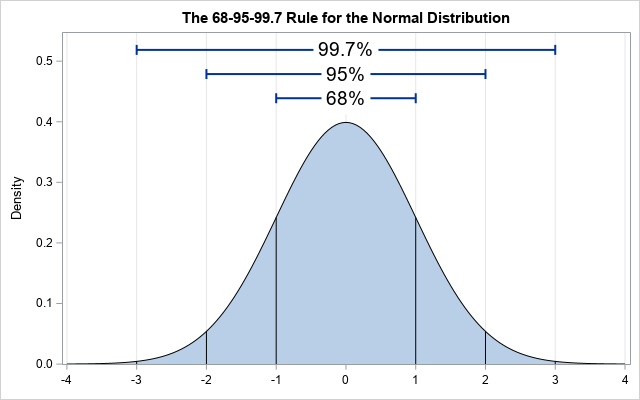

In [145]:
Image(filename='./normal_dist.png')

In [147]:
print(X[:5]) # first five values

tensor([[ -6.5398],
        [-16.0948],
        [ -1.0017],
        [ -6.0919],
        [ -9.7977]])


In [148]:
print(X.shape)

torch.Size([100, 1])


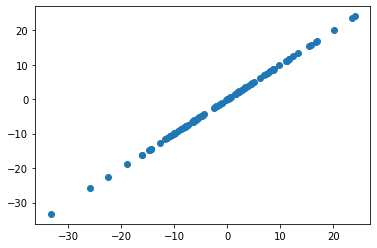

In [149]:
plt.plot(X.numpy(), y.numpy(), 'o')

In [150]:
## Let's add some noise to the dataset
y = X + 3*torch.randn(100, 1)

Text(0, 0.5, 'y')

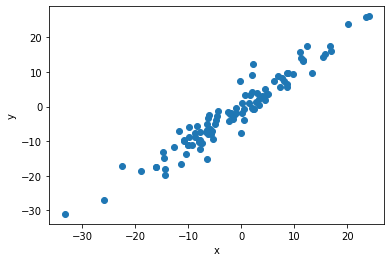

In [151]:
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [152]:
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [153]:
# item method to get a python value
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [159]:
def get_params(w, b):
    return (w[0][0].item(), b[0].item())

In [160]:
def plot_fit(title, w, b, X, y):
    plt.title = title
    w1, b1 = get_params(w, b)
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

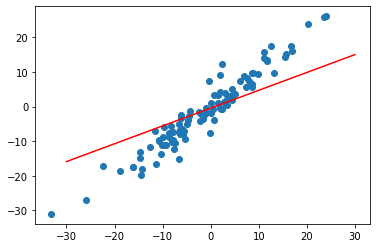

In [161]:
plot_fit(title='Starting Model', w=w, b=b, X=X, y=y)

## As you can tell, our line is not the best fit for our model.

## We will now implement gradient descent to optimize our model

## Basically, we are asking the computer to twist the red line to get as close as it can get to all the dots that is the most accurate (minimum loss/error)

## Gradient descent is an optimization algorithm for finding the minimum of a function

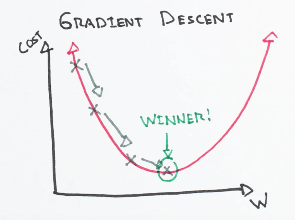

In [162]:
Image(filename='./gradient_descent_demystified.png') 

## Think of optimization as changing a number and seeing if the loss is getting better or worse

##  The closer to the zero loss (error) the better

In [163]:
def calc_loss(y, weight, pred_x):
    error_loss = (y - weight*pred_x)**2
    return error_loss

## Example x_actual = -3, y_actual = 3

In [164]:
weight = np.arange(-3.0, 1.5, 0.25)
x = -3
y = 3.0

## Linear slope of -x

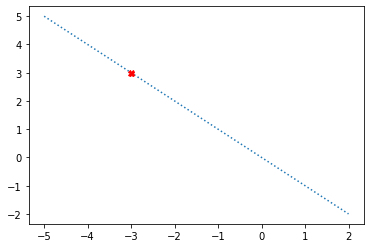

In [84]:
x1 = np.arange(-5,3,1)
y1 = -x1
plt.plot(x1, y1, linestyle='dotted')
plt.plot(x, y, 'X', color='r')

In [165]:
df = pd.DataFrame(data=weight, columns=['weight'])
df['error'] = df.apply(lambda pred_x: calc_loss(y=y, weight=weight, pred_x=x))
df

,weight,error
0,-3.00,36.0000
1,-2.75,27.5625
2,-2.50,20.2500
3,-2.25,14.0625
4,-2.00,9.0000
5,-1.75,5.0625
6,-1.50,2.2500
7,-1.25,0.5625
8,-1.00,0.0000
9,-0.75,0.5625


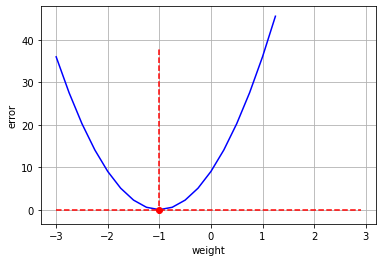

In [166]:
plt.plot(df['weight'], df['error'], color='blue')
plt.xlabel('weight')
plt.ylabel('error')
plt.grid(True)
plt.plot(np.full(40, -1), np.arange(-1, 39, 1), linestyle='dashed', color='red')
plt.plot(np.arange(-3,3,.1), np.full(60, 0), linestyle='dashed', color='red')
plt.plot(-1, 0, 'o', color='r')

## We can see in this example that at a weight of -1, the loss is zero, i.e. the optimal loss or think of it as minimum error.

## As we know, the slope is -1 in this simplistic example. This is where the weight = the slope i.e. zero error

<hr>

## Going back to our initial model, we will use a small learning rate to descent (negative) on the gradient until we find the correct fit. We will do this based on emperical results.

### - Think of rolling a marble downhill until it stops at the bottom

## Keep in mind that Pytorch does most of the work for you, so no worries if this can be a little too complex.

## Mean Square Error:

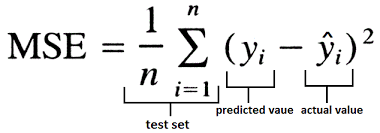

In [167]:
Image(filename='./mse.png') 

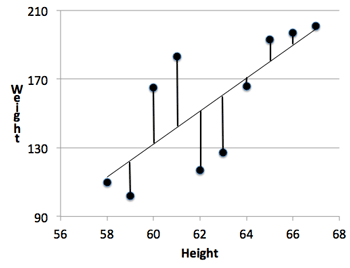

In [168]:
Image(filename='./mse_line.png') 

# Steps: 
## We start with some random model with random set of weight and bias values parameters.

## Then, we use gradient descent to update the weights of our model in the direction of the least error, minimize that error to return an optimized model.

## The great thing, is we don't have to worry about the math. We can implement this loss funciton easily with PyTorch

In [169]:
from torch.autograd import Variable # needed for model below

In [170]:
criterion = nn.MSELoss() # recall `import torch.nn as nn` above, Mean Square Error

In [171]:
learning_rate = .01
# Stochastic gradient descent algorithm (generally computationally faster)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [172]:
# Create mock data for training
x_values = np.arange(0,11,1.0)
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [173]:
x_values,  y_values

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 [1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0, 21.0])

In [174]:
x_train,  y_train

(array([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], dtype=float32),
 array([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.]], dtype=float32))

In [175]:
def run_model(epochs, x_train, y_train, learning_rate):
    
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    
    losses_dict = {}
    
    for epoch in range(epochs):

        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

        outputs = model(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        
        # clear gradient buffers so previous epoch don't carry forward i.e. accumulate
        optimizer.zero_grad() 
        
        losses_dict.update({epoch: loss.item()})
            
        print(f"epoch: {epoch}, loss: {loss.item()}")
        
    return losses_dict

In [176]:
model = LinearRegr(input_size=1, output_size=1)
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[-0.4114]], requires_grad=True) Parameter containing:
tensor([0.2438], requires_grad=True)


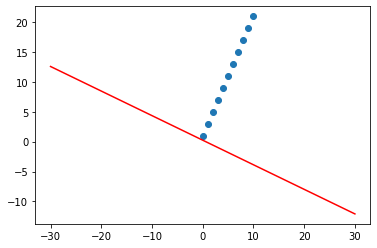

In [177]:
plot_fit(title='Starting Model', w=w, b=b, X=x_values, y=y_values)

# Underfitting and Overfitting models (# of epochs relation):

## Too little and you underfit (not enough time for the model to learn)

## Too many and you overfit i.e. too closely fit the model making it overly complex model to explain idiosyncrasies in the data. 

## In reality, the data often studied has some degree of error or random noise within it. Thus, attempting to make the model conform too closely to slightly inaccurate data can infect the model with substantial errors and reduce its predictive power.
<hr>

In [179]:
%%HTML
<img src="under_over_fitting.png" width="600"/>

## Set epochs to 100 to see if it is enough for this model

In [180]:
losses = run_model(epochs=100, x_train=x_train, y_train=y_train, learning_rate=.01)

epoch: 0, loss: 222.3334503173828
epoch: 1, loss: 18.17664909362793
epoch: 2, loss: 1.5237632989883423
epoch: 3, loss: 0.16498063504695892
epoch: 4, loss: 0.05369465425610542
epoch: 5, loss: 0.04416811093688011
epoch: 6, loss: 0.04294683039188385
epoch: 7, loss: 0.042407914996147156
epoch: 8, loss: 0.04192948341369629
epoch: 9, loss: 0.041460826992988586
epoch: 10, loss: 0.04099787026643753
epoch: 11, loss: 0.04054006561636925
epoch: 12, loss: 0.040087249130010605
epoch: 13, loss: 0.039639681577682495
epoch: 14, loss: 0.03919699043035507
epoch: 15, loss: 0.03875921294093132
epoch: 16, loss: 0.038326576352119446
epoch: 17, loss: 0.03789856284856796
epoch: 18, loss: 0.03747537359595299
epoch: 19, loss: 0.03705689311027527
epoch: 20, loss: 0.03664299473166466
epoch: 21, loss: 0.03623378649353981
epoch: 22, loss: 0.03582918643951416
epoch: 23, loss: 0.035429082810878754
epoch: 24, loss: 0.03503337875008583
epoch: 25, loss: 0.03464221954345703
epoch: 26, loss: 0.03425534814596176
epoch: 27,

## Let's graph our losses to see how quickly the model learns. 100 epochs seems like overkill at this point.

Text(0.5, 0, 'epoch')

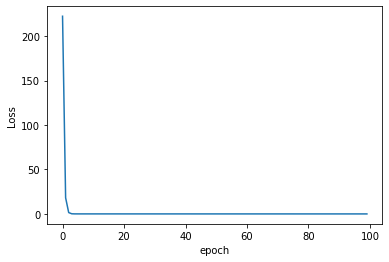

In [181]:
lists = sorted(losses.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [182]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
print(predicted)

[[ 0.771485 ]
 [ 2.8043933]
 [ 4.8373013]
 [ 6.870209 ]
 [ 8.903118 ]
 [10.936027 ]
 [12.968934 ]
 [15.0018425]
 [17.03475  ]
 [19.067657 ]
 [21.100567 ]]


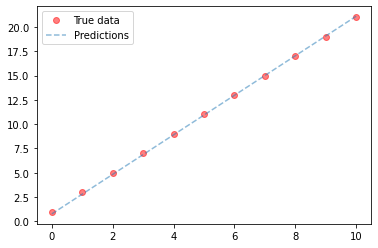

In [183]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5, color='r')
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')

## Let's create a more difficult model with random values

In [184]:
# Create mock data with random values
x_values = torch.randn(100, 1)*10
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = x_values + 3*torch.randn(100, 1)
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [185]:
model = LinearRegr(input_size=1, output_size=1)
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.0098]], requires_grad=True) Parameter containing:
tensor([-0.5778], requires_grad=True)


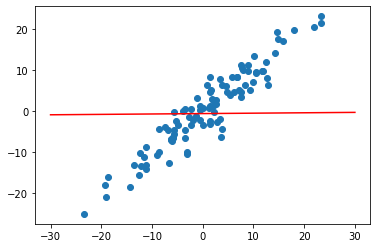

In [186]:
plot_fit(title='Starting Model', w=w, b=b, X=x_values, y=y_values)

In [187]:
losses = run_model(epochs=100, x_train=x_train, y_train=y_train, learning_rate=.01)

epoch: 0, loss: 95.12322235107422
epoch: 1, loss: 58.74631881713867
epoch: 2, loss: 37.93123245239258
epoch: 3, loss: 26.02007484436035
epoch: 4, loss: 19.203502655029297
epoch: 5, loss: 15.30191421508789
epoch: 6, loss: 13.068254470825195
epoch: 7, loss: 11.788965225219727
epoch: 8, loss: 11.05578899383545
epoch: 9, loss: 10.635124206542969
epoch: 10, loss: 10.393318176269531
epoch: 11, loss: 10.253889083862305
epoch: 12, loss: 10.173080444335938
epoch: 13, loss: 10.125853538513184
epoch: 14, loss: 10.097879409790039
epoch: 15, loss: 10.08095932006836
epoch: 16, loss: 10.070398330688477
epoch: 17, loss: 10.063509941101074
epoch: 18, loss: 10.058757781982422
epoch: 19, loss: 10.055259704589844
epoch: 20, loss: 10.052508354187012
epoch: 21, loss: 10.050213813781738
epoch: 22, loss: 10.048209190368652
epoch: 23, loss: 10.046399116516113
epoch: 24, loss: 10.04472541809082
epoch: 25, loss: 10.043152809143066
epoch: 26, loss: 10.041664123535156
epoch: 27, loss: 10.040246963500977
epoch: 28,

Text(0.5, 0, 'epoch')

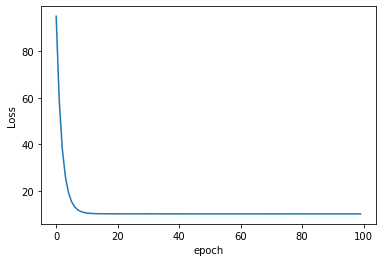

In [188]:
lists = sorted(losses.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [189]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
print(predicted)

[[ -0.16626287]
 [-18.856419  ]
 [ 17.542011  ]
 [  2.506198  ]
 [  1.8397679 ]
 [  9.007414  ]
 [ 14.231986  ]
 [ -5.8062434 ]
 [  5.3629336 ]
 [ -1.6276996 ]
 [  3.1139383 ]
 [  3.392229  ]
 [  3.4266675 ]
 [ -6.049946  ]
 [ -5.96315   ]
 [  9.713483  ]
 [ 11.263498  ]
 [ 14.36031   ]
 [  2.3597708 ]
 [  7.2005305 ]
 [-12.73813   ]
 [  8.582222  ]
 [  1.3675479 ]
 [  7.1539674 ]
 [ -3.6986623 ]
 [ -6.4082446 ]
 [ 12.123917  ]
 [ -0.8015269 ]
 [-12.542036  ]
 [ 15.350475  ]
 [-11.351203  ]
 [  7.3159766 ]
 [ 22.852552  ]
 [ -6.4556036 ]
 [ -1.4623642 ]
 [-14.580692  ]
 [-11.299458  ]
 [-11.377663  ]
 [  7.2191176 ]
 [ -5.203597  ]
 [ 10.020906  ]
 [  0.5070827 ]
 [ 13.851533  ]
 [ -2.1002584 ]
 [  7.972514  ]
 [-19.280212  ]
 [ -3.6812613 ]
 [ -6.836976  ]
 [  1.4857789 ]
 [  1.1413804 ]
 [ -3.8488157 ]
 [  4.4579444 ]
 [ -2.6532125 ]
 [-13.710819  ]
 [  2.370479  ]
 [  0.84314847]
 [ -9.130699  ]
 [ -7.752829  ]
 [ -0.859486  ]
 [ 21.507908  ]
 [  9.530354  ]
 [ -0.87292135]
 [ 11.38

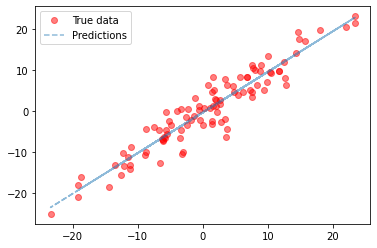

In [190]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5, color='r')
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')

## Part 2 # Deep Learning section ... to be continued...